In [29]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [30]:
clean_lines = []
with open('/Users/gl396/Desktop/sandbox/nanoGPT/data/capote/incoldblood.txt', 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        # Skip empty or comment lines
        if not line or line.startswith('#'):
            continue
        
        # If line starts with <...>, remove that piece
        # e.g., "<f1r.1,@P0>       <%>fachys.ykal..." -> "      <%>fachys.ykal..."
        # This simple approach finds the first space and slices; adjust as needed
        if line.startswith('<'):
            first_space_idx = line.find(' ')
            if first_space_idx != -1:
                line = line[first_space_idx:].strip()
        
        # Remove any remaining bracketed tags if you don't want them
        # e.g., remove "<%>" or "<! ...>"
        import re
        line = re.sub(r'<.*?>', '', line).strip()
        
        # If there's still something left, keep it
        if line:
            clean_lines.append(line)

# Now 'clean_lines' should mostly contain just Voynich text.
clean_text = "\n".join(clean_lines)

with open('/Users/gl396/Desktop/sandbox/nanoGPT/data/capote/incoldblood.txt', 'w', encoding='utf-8') as f:
    f.write(clean_text)

In [31]:
len(clean_text)

892860

In [33]:
# read cleaned text
with open('/Users/gl396/Desktop/sandbox/nanoGPT/data/capote/clean_incoldblood.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Clip to match Voynich size (228845 characters)
text = text[:228845]

chars = sorted(list(set(text)))
vocab_size = len(chars)
stoi = { ch: i for i, ch in enumerate(chars) }
itos = { i: ch for i, ch in enumerate(chars) }

def encode(s):
    return [stoi[c] for c in s]

train_size = int(0.9 * len(text))  # still keeping 90-10 split
train_ids = encode(text[:train_size])
val_ids = encode(text[train_size:])

with open('/Users/gl396/Desktop/sandbox/nanoGPT/data/capote/train_ids.txt', 'w') as f:
    f.write(' '.join(str(i) for i in train_ids))
with open('/Users/gl396/Desktop/sandbox/nanoGPT/data/capote/val_ids.txt', 'w') as f:
    f.write(' '.join(str(i) for i in val_ids))

with open('/Users/gl396/Desktop/sandbox/nanoGP:T/data/capote/meta.txt', 'w') as f:
    f.write(str(vocab_size) + "\n")
    f.write("".join(chars) + "\n")


In [34]:
# 1. Load IDs from text
train_ids = np.loadtxt('/Users/gl396/Desktop/sandbox/nanoGPT/data/capote/train_ids.txt', dtype=np.uint16)
val_ids = np.loadtxt('/Users/gl396/Desktop/sandbox/nanoGPT/data/capote/val_ids.txt', dtype=np.uint16)

# 2. Save as binary
train_ids.tofile('/Users/gl396/Desktop/sandbox/nanoGPT/data/capote/train.bin')
val_ids.tofile('/Users/gl396/Desktop/sandbox/nanoGPT/data/capote/val.bin')


#### loss evaluation

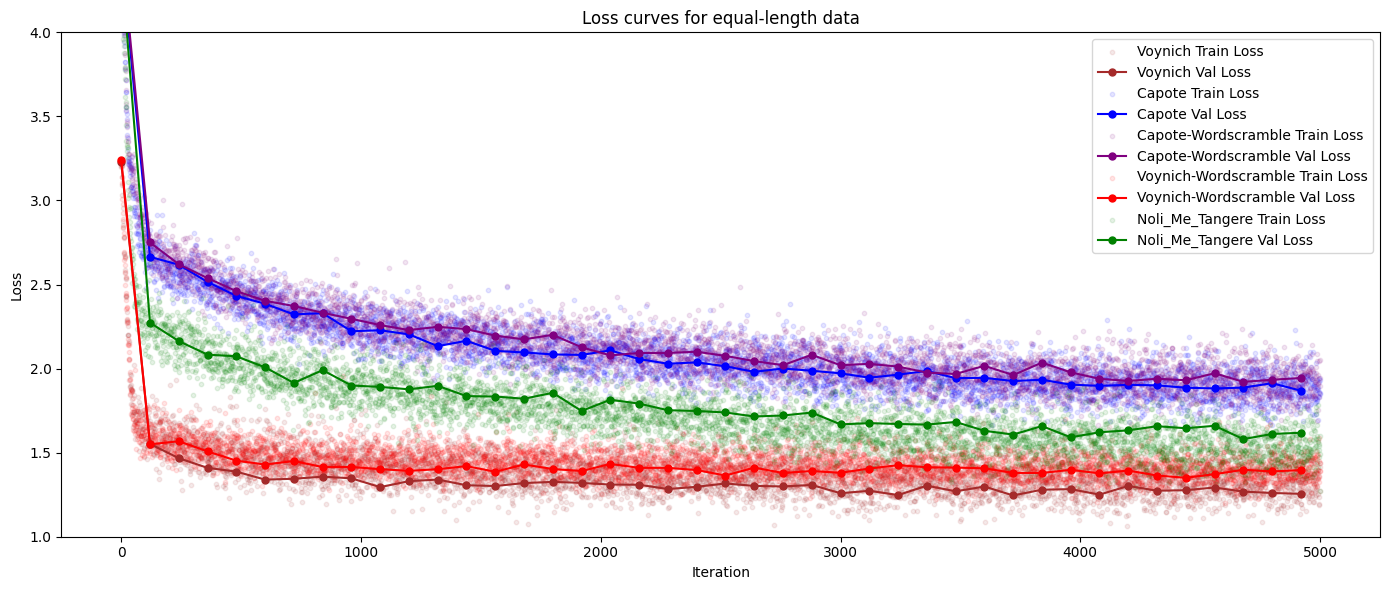

In [6]:
import re
import matplotlib.pyplot as plt

def extract_loss_data(log_file):
    train_iters, train_losses = [], []
    val_iters, val_losses = [], []
    with open(log_file, "r") as f:
        for line in f:
            line = line.strip()
            m_train = re.match(r"iter\s+(\d+):\s+loss\s+([\d\.]+)", line)
            m_val = re.match(r"step\s+(\d+):\s+train loss\s+([\d\.]+),\s+val loss\s+([\d\.]+)", line)
            if m_train:
                train_iters.append(int(m_train.group(1)))
                train_losses.append(float(m_train.group(2)))
            elif m_val:
                val_iters.append(int(m_val.group(1)))
                val_losses.append(float(m_val.group(3)))
    return train_iters, train_losses, val_iters, val_losses

#datasets = ['voynich', 'aurebours', 'capote', 'capote-wordscramble','voynich-wordscramble']
#colors = {'voynich': 'brown', 'aurebours': 'green', 'capote': 'blue', 'capote-wordscramble': 'black', 'voynich-wordscramble': 'red'}

datasets = ['voynich', 'capote', 'capote-wordscramble','voynich-wordscramble','noli_me_tangere']
colors = {'voynich': 'brown', 'capote': 'blue', 'capote-wordscramble': 'purple', 'voynich-wordscramble': 'red','noli_me_tangere': 'green'}

base_path = "/Users/gl396/Desktop/sandbox/nanoGPT"
log_filename = "output.log"

fig, ax = plt.subplots(1, 1, figsize=(14, 6))

for ds in datasets:
    log_file = f"{base_path}/out-{ds}-char/{log_filename}"
    train_iters, train_losses, val_iters, val_losses = extract_loss_data(log_file)
    
    ax.scatter(train_iters, train_losses, s=10, c=colors[ds], alpha=0.1, label=f"{ds.title()} Train Loss")
    ax.plot(val_iters, val_losses, '-o', color=colors[ds], markersize=5, label=f"{ds.title()} Val Loss")

ax.set_ylim(1, 4)
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
ax.set_title("Loss curves for equal-length data")
ax.legend()

plt.tight_layout()
plt.show()


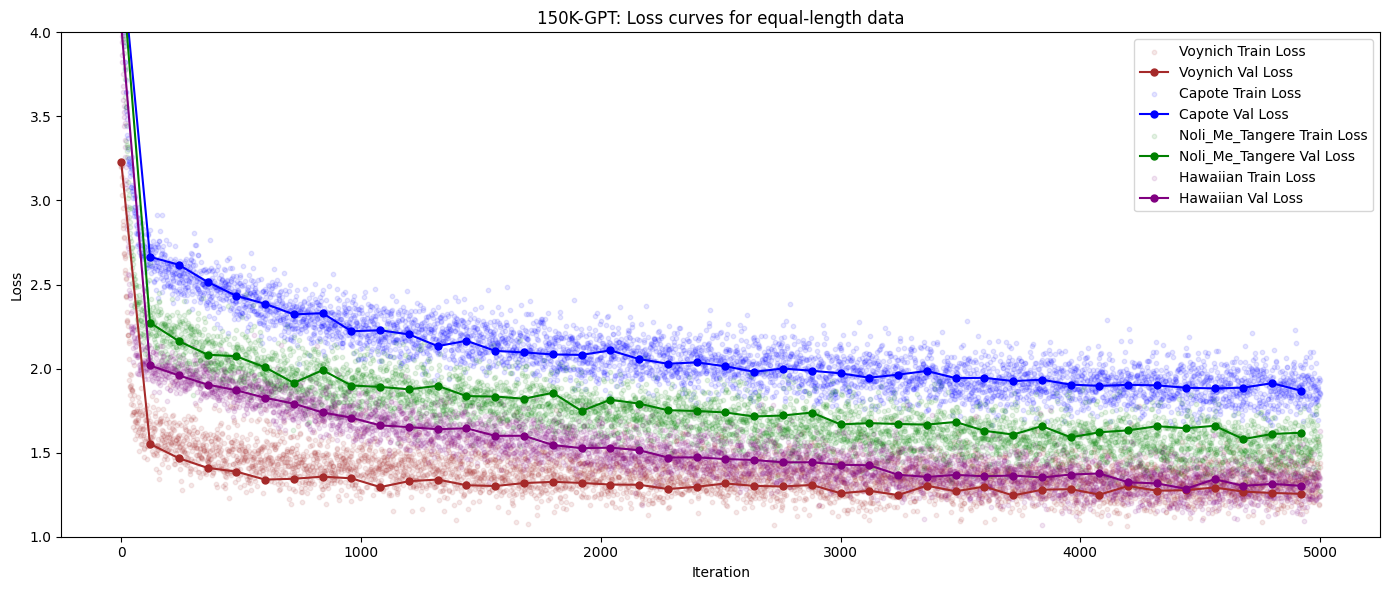

In [9]:
import re
import matplotlib.pyplot as plt

def extract_loss_data(log_file):
    train_iters, train_losses = [], []
    val_iters, val_losses = [], []
    with open(log_file, "r") as f:
        for line in f:
            line = line.strip()
            m_train = re.match(r"iter\s+(\d+):\s+loss\s+([\d\.]+)", line)
            m_val = re.match(r"step\s+(\d+):\s+train loss\s+([\d\.]+),\s+val loss\s+([\d\.]+)", line)
            if m_train:
                train_iters.append(int(m_train.group(1)))
                train_losses.append(float(m_train.group(2)))
            elif m_val:
                val_iters.append(int(m_val.group(1)))
                val_losses.append(float(m_val.group(3)))
    return train_iters, train_losses, val_iters, val_losses

#datasets = ['voynich', 'aurebours', 'capote', 'capote-wordscramble','voynich-wordscramble']
#colors = {'voynich': 'brown', 'aurebours': 'green', 'capote': 'blue', 'capote-wordscramble': 'black', 'voynich-wordscramble': 'red'}

datasets = ['voynich', 'capote','noli_me_tangere','hawaiian']
colors = {'voynich': 'brown', 'capote': 'blue','noli_me_tangere': 'green','hawaiian':'purple'}

base_path = "/Users/gl396/Desktop/sandbox/nanoGPT"
log_filename = "output.log"

fig, ax = plt.subplots(1, 1, figsize=(14, 6))

for ds in datasets:
    log_file = f"{base_path}/out-{ds}-char/{log_filename}"
    train_iters, train_losses, val_iters, val_losses = extract_loss_data(log_file)
    
    ax.scatter(train_iters, train_losses, s=10, c=colors[ds], alpha=0.1, label=f"{ds.title()} Train Loss")
    ax.plot(val_iters, val_losses, '-o', color=colors[ds], markersize=5, label=f"{ds.title()} Val Loss")

ax.set_ylim(1, 4)
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
ax.set_title("150K-GPT: Loss curves for equal-length data")
ax.legend()

plt.tight_layout()
plt.show()